In [26]:
from dataset import *
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
raw_synthetic_dataset = FinancialDataset(synthetic=True, n_simul=10)
raw_real_dataset = FinancialDataset(synthetic=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


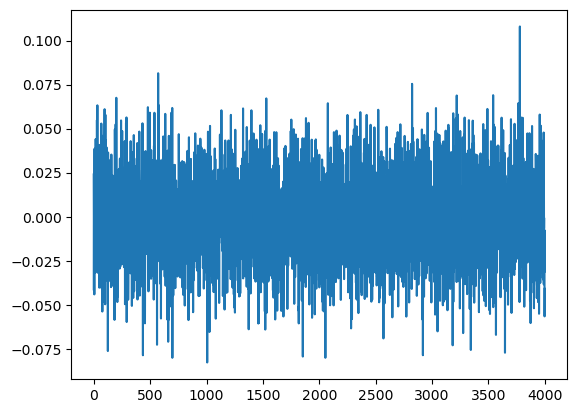

In [28]:
plt.plot(raw_synthetic_dataset.dataset[3, :, 0].numpy())

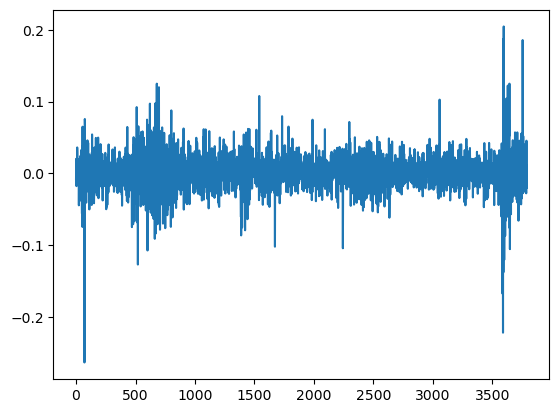

In [72]:
plt.plot(raw_real_dataset.dataset[0 , :, 0].numpy())

In [6]:
synthetic_data = raw_synthetic_dataset.dataset
synthetic_data

tensor([[[-0.0098, -0.0077],
         [-0.0315, -0.0219],
         [-0.0176, -0.0072],
         ...,
         [-0.0244, -0.0121],
         [ 0.0172,  0.0398],
         [ 0.0039,  0.0191]],

        [[-0.0252,  0.0103],
         [ 0.0092, -0.0174],
         [ 0.0055, -0.0013],
         ...,
         [-0.0304, -0.0197],
         [-0.0058, -0.0076],
         [-0.0182,  0.0197]],

        [[ 0.0077,  0.0011],
         [ 0.0124,  0.0095],
         [ 0.0399,  0.0122],
         ...,
         [-0.0104,  0.0065],
         [ 0.0045,  0.0075],
         [ 0.0454,  0.0187]],

        ...,

        [[ 0.0444,  0.0175],
         [-0.0096, -0.0252],
         [-0.0298, -0.0021],
         ...,
         [-0.0200,  0.0202],
         [ 0.0093,  0.0340],
         [-0.0258,  0.0005]],

        [[ 0.0218,  0.0183],
         [ 0.0098, -0.0258],
         [ 0.0222,  0.0084],
         ...,
         [ 0.0028,  0.0121],
         [ 0.0338,  0.0038],
         [ 0.0139,  0.0009]],

        [[ 0.0316, -0.0039],
       

In [75]:
synthetic_data.shape

torch.Size([10, 4000, 2])

In [76]:
real_data = raw_real_dataset.dataset
real_data


tensor([[[-0.0077,  0.0366],
         [ 0.0051,  0.0158],
         [ 0.0205, -0.0050],
         ...,
         [-0.0007,  0.0152],
         [ 0.0119,  0.0175],
         [-0.0196,  0.0006]]])

In [37]:
real_data.shape

torch.Size([1, 3791, 2])

In [38]:
import pandas as pd
date_source = pd.date_range(start='2006-03-01', periods=real_data.shape[1], freq="B")
date_source

DatetimeIndex(['2006-03-01', '2006-03-02', '2006-03-03', '2006-03-06',
               '2006-03-07', '2006-03-08', '2006-03-09', '2006-03-10',
               '2006-03-13', '2006-03-14',
               ...
               '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-07',
               '2020-09-08', '2020-09-09'],
              dtype='datetime64[ns]', length=3791, freq='B')

In [39]:
raw_real_dataset._raw_data['returns']

,AIR.PA_rt,MC.PA_rt
Date,,
2006-03-02,-0.007660,0.036577
2006-03-03,0.005146,0.015753
2006-03-06,0.020480,-0.004963
2006-03-07,-0.005331,-0.008105
2006-03-08,-0.017654,-0.015085
...,...,...
2020-12-23,0.045599,0.007719
2020-12-24,0.000979,0.000706
2020-12-28,-0.000652,0.015208


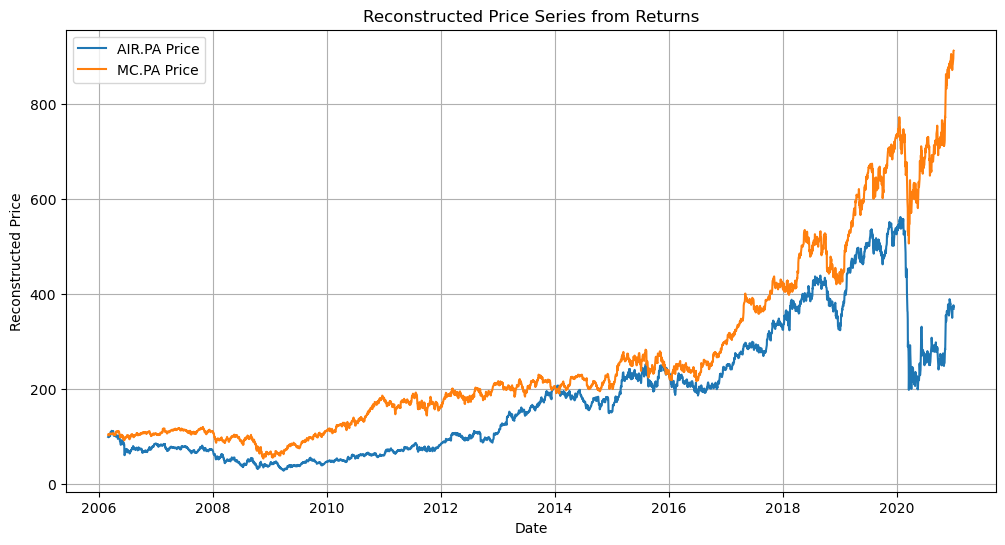

In [84]:
import matplotlib.pyplot as plt

df = raw_real_dataset._raw_data['returns'].copy()

initial_price = 100

price_df = (1 + df).cumprod() * initial_price

plt.figure(figsize=(12, 6))
plt.plot(price_df.index, price_df['AIR.PA_rt'], label='AIR.PA Price')
plt.plot(price_df.index, price_df['MC.PA_rt'], label='MC.PA Price')

plt.xlabel('Date')
plt.ylabel('Reconstructed Price')
plt.title('Reconstructed Price Series from Returns')
plt.legend()
plt.grid()
plt.show()

# To print the price you need the dataloader because it has the indices :))

In [628]:
financial_dataset = FinancialDataset(synthetic=True, n_simul=5)
#financial_dataset._raw_data_synthetic.plot()
#financial_dataset._raw_data['returns'].plot()

[*********************100%***********************]  2 of 2 completed


In [632]:
financial_dataset.dataset_synthetic.shape

torch.Size([5, 3791, 2])

In [633]:
financial_dataset._raw_data['returns']

,AIR.PA_rt,MC.PA_rt
Date,,
2006-03-02,-0.007661,0.036577
2006-03-03,0.005147,0.015753
2006-03-06,0.020480,-0.004963
2006-03-07,-0.005331,-0.008105
2006-03-08,-0.017654,-0.015085
...,...,...
2020-12-23,0.045599,0.007719
2020-12-24,0.000979,0.000706
2020-12-28,-0.000652,0.015208


In [638]:
from trainer_new import PortfolioTrainer
from models import NN_Sharpe



In [671]:
model = NN_Sharpe()
financial_dataset = FinancialDataset(synthetic=True, n_simul=5)
data_handler = DataHandler(financial_dataset)
trainer = PortfolioTrainer(model, data_handler, 'cpu', epochs=10)

[*********************100%***********************]  2 of 2 completed


In [672]:
trainer.train()

Training period from 51 to 1059
Investment period from 1059 to 1563


Loss_epoch:= -0.011622700214502402


Loss_epoch:= -0.013414656605164055


Loss_epoch:= -0.014012377039762214


Loss_epoch:= -0.014571907864592504


Loss_epoch:= -0.01571435148071032


Loss_epoch:= -0.01734430296710343
Loss_epoch:= -0.01774465324706398


Loss_epoch:= -0.017439754141378216
Loss_epoch:= -0.01835940349701559


100%|██████████| 10/10 [00:01<00:00,  5.14it/s]


Loss_epoch:= -0.01895134078222327
Training period from 1059 to 1563
Investment period from 1563 to 2067


Loss_epoch:= -0.0894198298919946


Loss_epoch:= -0.08900496899150312
Loss_epoch:= -0.08925574319437146


Loss_epoch:= -0.08981136931106448
Loss_epoch:= -0.09007088700309396


Loss_epoch:= -0.08984437258914113


Loss_epoch:= -0.0898827607743442
Loss_epoch:= -0.0900327863637358
Loss_epoch:= -0.09024719567969441


100%|██████████| 10/10 [00:00<00:00, 10.22it/s]


Loss_epoch:= -0.09052023710682988
Training period from 1563 to 2067
Investment period from 2067 to 2571


Loss_epoch:= -0.07212586991954595


Loss_epoch:= -0.07395925465971231
Loss_epoch:= -0.07616196083836257


Loss_epoch:= -0.07610498345457017


Loss_epoch:= -0.07724786596372724
Loss_epoch:= -0.07808290980756283
Loss_epoch:= -0.07869063853286207


Loss_epoch:= -0.0788275437662378
Loss_epoch:= -0.07914978847838938


100%|██████████| 10/10 [00:00<00:00, 10.60it/s]

Loss_epoch:= -0.07957386481575668


Training period from 2067 to 2571
Investment period from 2571 to 3075


Loss_epoch:= -0.026627844548784196


Loss_epoch:= -0.027622751658782363
Loss_epoch:= -0.02663461398333311


Loss_epoch:= -0.027111677180073457
Loss_epoch:= -0.026829743204871193


Loss_epoch:= -0.02788792143110186
Loss_epoch:= -0.027415964083047584


Loss_epoch:= -0.02779748145258054
Loss_epoch:= -0.02819042676128447


100%|██████████| 10/10 [00:00<00:00, 10.10it/s]


Loss_epoch:= -0.028033327835146338
Training period from 2571 to 3075
Investment period from 3075 to 3579


Loss_epoch:= -0.11313453502953053


Loss_epoch:= -0.11361687327735126
Loss_epoch:= -0.1142847565934062


Loss_epoch:= -0.11534964293241501
Loss_epoch:= -0.116031673271209


Loss_epoch:= -0.11631774343550205
Loss_epoch:= -0.11708350805565715


Loss_epoch:= -0.11731353215873241
Loss_epoch:= -0.1173575147986412


100%|██████████| 10/10 [00:00<00:00, 10.13it/s]

Loss_epoch:= -0.11783972242847085


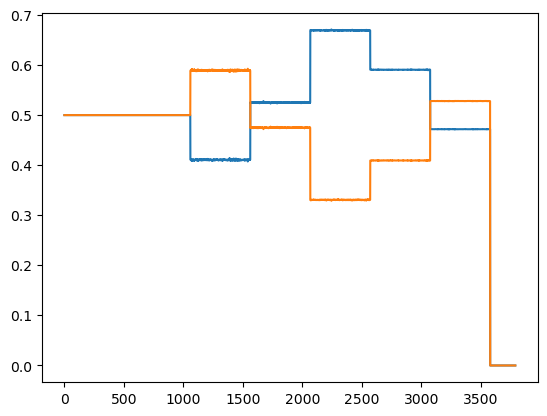

In [674]:
plt.plot(trainer.weights)

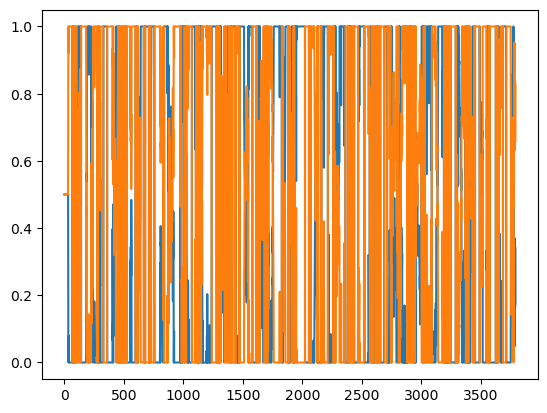

In [675]:
plt.plot(trainer.weights_markowitz)

In [491]:
financial_dataset._raw_data['returns'].index[]

SyntaxError: invalid syntax (2334249599.py, line 1)

In [629]:
real_dataloader = DataHandler(dataset=financial_dataset, batch_size = 5, overlap=True, is_synthetic=True)

In [627]:
real_dataloader.periods_train

[(51, 1059), (1059, 1563), (1563, 2067), (2067, 2571), (2571, 3075)]

In [617]:
for el in [(real_dataloader.periods_train[i], real_dataloader.periods_invest[i]) for i in range(len(real_dataloader.periods_train))]:
    print(f'TRAIN : {el[0]}, INVEST :{el[1]}')


TRAIN : (51, 1059), INVEST :(1059, 1563)
TRAIN : (1059, 1563), INVEST :(1563, 2067)
TRAIN : (1563, 2067), INVEST :(2067, 2571)
TRAIN : (2067, 2571), INVEST :(2571, 3075)
TRAIN : (2571, 3075), INVEST :(3075, 3579)


In [630]:
dataloader, xtest, tuples = real_dataloader.load_period(0)

Training period from 51 to 1059
Investment period from 1059 to 1563


In [631]:
X_test.shape

torch.Size([504, 50, 2])

In [604]:
1563-1059

504

In [541]:
financial_dataset.dataset.shape

torch.Size([1, 3791, 2])

In [526]:
X_test.shape

torch.Size([454, 50, 2])

In [527]:
1563-1059

504

In [500]:
financial_dataset._raw_data['returns'].index[50+1:]

DatetimeIndex(['2006-05-17', '2006-05-18', '2006-05-19', '2006-05-22',
               '2006-05-23', '2006-05-24', '2006-05-25', '2006-05-26',
               '2006-05-29', '2006-05-30',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=3740, freq=None)

In [341]:
synthetic_dataloader = DataHandler(dataset=raw_synthetic_dataset, batch_size = 3, is_synthetic=True)

In [342]:
raw_synthetic_dataset._raw_data['returns']

,AIR.PA_rt,MC.PA_rt
Date,,
2006-03-02,-0.007661,0.036577
2006-03-03,0.005147,0.015753
2006-03-06,0.020480,-0.004963
2006-03-07,-0.005331,-0.008105
2006-03-08,-0.017654,-0.015085
...,...,...
2020-12-23,0.045599,0.007719
2020-12-24,0.000979,0.000706
2020-12-28,-0.000652,0.015208


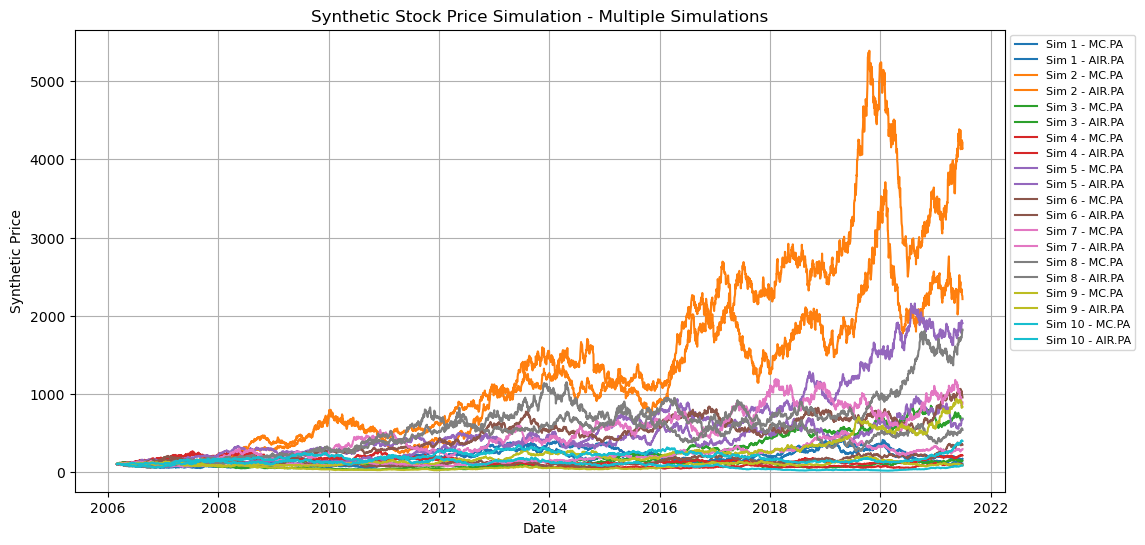

In [123]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert synthetic data to NumPy (Shape: n_simul, n_dates, n_assets)
synthetic_returns = synthetic_data.numpy()  # Shape: (n_simul, n_dates, n_assets)

# Get the number of simulations, dates, and assets
n_simul, n_dates, n_assets = synthetic_returns.shape

# Get the date index from DataHandler
date_range = synthetic_dataloader.date_range

# Convert Returns to Prices for All Simulations (Assume Initial Price = 100)
initial_price = 100
synthetic_prices = initial_price * (1 + synthetic_returns).cumprod(axis=1)  # Cumprod over time (axis=1)

# Plot the price series for each simulation and asset
plt.figure(figsize=(12, 6))

# Use different colors for each simulation and asset
colors = plt.get_cmap("tab10", n_simul * n_assets)  # Generate colors

for sim in range(n_simul):
    for asset_idx, ticker in enumerate(raw_synthetic_dataset.tickers):
        plt.plot(date_range, synthetic_prices[sim, :, asset_idx], 
                 label=f"Sim {sim+1} - {ticker}", color=colors(sim * n_assets + asset_idx))

# Formatting
plt.xlabel("Date")
plt.ylabel("Synthetic Price")
plt.title("Synthetic Stock Price Simulation - Multiple Simulations")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))  # Legend outside the plot
plt.grid()
plt.show()


In [393]:
dataloader, X_test, (start_training, end_training, start_invest, end_invest) = real_dataloader.loader_period(0)

Training period from 2006-05-16 00:00:00 to 2010-04-27 00:00:00
Investment period from 2010-04-27 00:00:00 to 2012-04-11 00:00:00


In [390]:
(start_training, end_training, start_invest, end_invest)

(Timestamp('2006-05-16 00:00:00'),
 Timestamp('2010-04-27 00:00:00'),
 Timestamp('2010-04-27 00:00:00'),
 Timestamp('2012-04-11 00:00:00'))

In [392]:
X_test.shape

torch.Size([504, 50, 2])

In [276]:
raw_real_dataset._raw_data['prices'].query("20060302<=index<=20100212")

Ticker,AIR.PA,MC.PA
Date,,
2006-03-02,23.606960,54.775661
2006-03-03,23.728455,55.638538
2006-03-06,24.214409,55.362427
2006-03-07,24.085325,54.913734
2006-03-08,23.660114,54.085354
...,...,...
2010-02-08,11.302876,57.516445
2010-02-09,11.137486,58.135136
2010-02-10,11.129418,58.716114


In [261]:
data = real_dataloader._compute_data(start, end, rolling_window=50, overlap=True, training=True)

In [273]:
print(len(data[0]), len(data[0][0]))

957 2


In [275]:
test_data.shape[0]-50

959

In [207]:
c=0
for batch_x, batch_y in dataloader: 
    c+=1
    print(batch_x.shape, batch_y.shape)
print(c)

torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size(

In [141]:
from models import *
from trainer import *  

lstm = NN_Sharpe()
trainer = PortfolioTrainer(model = lstm, data_handler=synthetic_dataloader, permute_assets=False, epochs = 1, lr = 0.001, weight_decay= 0.2 )

Training period from 2006-03-01 00:00:00 to 2010-01-11 00:00:00
Investment period from 2010-01-11 00:00:00 to 2011-12-16 00:00:00




100%|██████████| 1/1 [00:12<00:00, 12.73s/it]

Loss_epoch:= -0.0441537261935099
alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2010-01-11 00:00:00 to 2011-12-16 00:00:00
Investment period from 2011-12-16 00:00:00 to 2013-11-21 00:00:00



100%|██████████| 1/1 [00:06<00:00,  6.03s/it]


Loss_epoch:= -0.033565480435790114
alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2011-12-16 00:00:00 to 2013-11-21 00:00:00
Investment period from 2013-11-21 00:00:00 to 2015-10-28 00:00:00


100%|██████████| 1/1 [00:05<00:00,  5.97s/it]


Loss_epoch:= -0.05075548296821134
alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2013-11-21 00:00:00 to 2015-10-28 00:00:00
Investment period from 2015-10-28 00:00:00 to 2017-10-03 00:00:00


100%|██████████| 1/1 [00:05<00:00,  5.96s/it]


Loss_epoch:= -0.010154181194841702
alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2015-10-28 00:00:00 to 2017-10-03 00:00:00
Investment period from 2017-10-03 00:00:00 to 2019-09-09 00:00:00


100%|██████████| 1/1 [00:05<00:00,  5.96s/it]

Loss_epoch:= -0.025252552108645885
alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])


In [142]:
result = trainer.result

In [143]:
result

,AIR.PA_rt_alloc_sim1,MC.PA_rt_alloc_sim1,AIR.PA_rt_alloc_sim2,MC.PA_rt_alloc_sim2,AIR.PA_rt_alloc_sim3,MC.PA_rt_alloc_sim3,AIR.PA_rt_alloc_sim4,MC.PA_rt_alloc_sim4,AIR.PA_rt_alloc_sim5,MC.PA_rt_alloc_sim5,AIR.PA_rt_alloc_sim6,MC.PA_rt_alloc_sim6,AIR.PA_rt_alloc_sim7,MC.PA_rt_alloc_sim7,AIR.PA_rt_alloc_sim8,MC.PA_rt_alloc_sim8,AIR.PA_rt_alloc_sim9,MC.PA_rt_alloc_sim9,AIR.PA_rt_alloc_sim10,MC.PA_rt_alloc_sim10
2010-01-11,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021
2010-01-12,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021
2010-01-13,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021
2010-01-14,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021
2010-01-15,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021,0.188979,0.811021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-02,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478
2019-09-03,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478
2019-09-04,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478
2019-09-05,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478,0.389522,0.610478


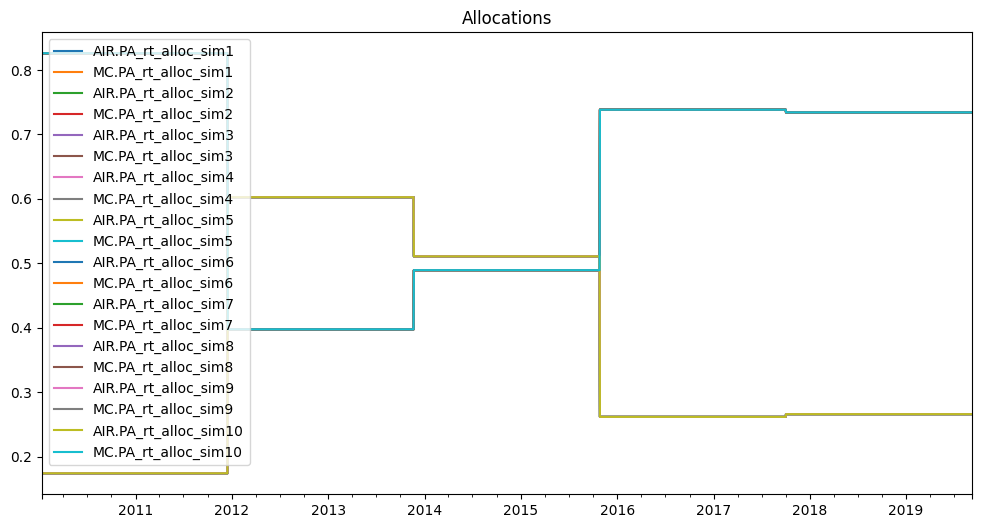

In [51]:
result.plot(figsize=(12,6), title="Allocations")
plt.show()
